<a href="https://colab.research.google.com/github/rafsantos/tcc_colab_py/blob/main/TCC_testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

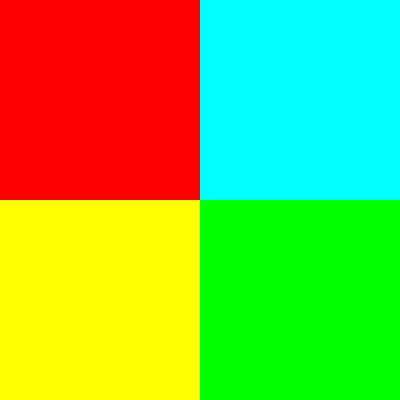

In [1]:
import numpy as np
import cv2 as cv
from PIL import Image

img = np.array([
                [[255 , 000 , 000] , [000 , 255 , 255]]
               ,[[255 , 255 , 000] , [000 , 255 , 000]]
               ])
img = Image.fromarray(img.astype('uint8'),'RGB')
img = img.resize((400,400),resample=Image.NEAREST)
img.show()


## Carregando imagem de uma URL
Script para carregar uma imagem de um URL e pixelar para mostrar os pixels claramente.

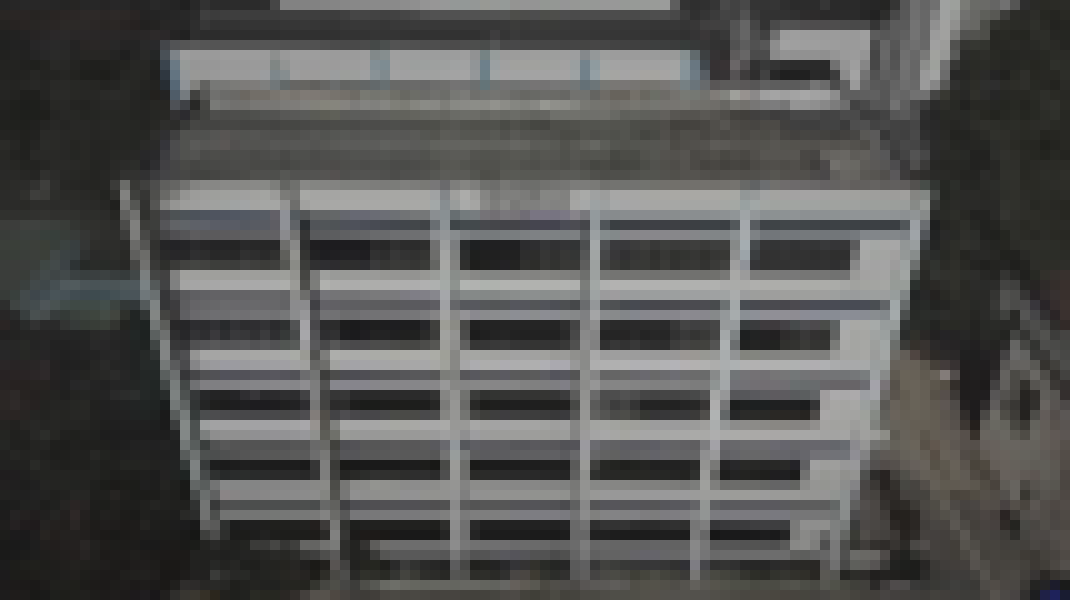

In [2]:
from PIL import Image
import requests
from io import BytesIO
url = "https://www.cnnbrasil.com.br/wp-content/uploads/sites/12/2022/06/unirio-e1655769715522.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((img.width // 10,img.height // 10))
img = img.resize((img.width * 10,img.height * 10), resample=Image.NEAREST)
img.show()


# Testes implementando convolução

https://stackoverflow.com/questions/63036809/how-do-i-use-only-numpy-to-apply-filters-onto-images

In [2]:
# @title Tipo de Filtro

dropdown = 'Blur' #@param ["Blur", "Cantos Horizontal", "Cantos Vertical"]


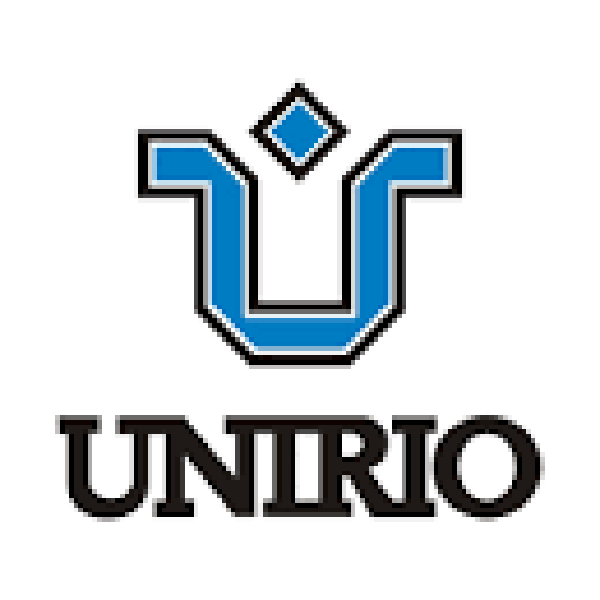

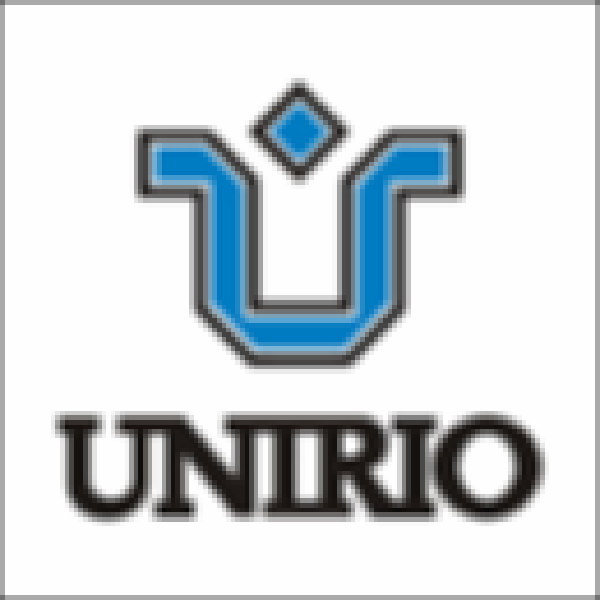

In [35]:
#@title Codigo que implementa convolução

# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
import numpy as np
from PIL import Image
import pdb
import time
import requests
from matplotlib import pyplot as plt

##### Filtros #####
if dropdown == 'Blur':
    filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32)/9.0

if dropdown == 'Cantos Horizontal':
    filter = np.array([
    [-1, 0, +1],
    [-1, 0, +1],
    [-1, 0, +1]
], dtype=np.float32)/9.0

if dropdown == 'Cantos Vertical':
    filter = np.array([
    [+1, +1, +1],
    [0,  0,  0],
    [-1, -1, -1]
], dtype=np.float32)/9.0


##### Funcoes #########
def convolve(image, filter, padding = (1, 1)):
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1)
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1)
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]

    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1,
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    frames = 0
    for x in range(padded_image.shape[0] - size_x +1):
        for y in range(padded_image.shape[1] - size_y +1):

            # Janela movel do filtro
            window = padded_image[x:x + size_x, y:y + size_y]
            # Soma do produto da janela fo filtro e área da imagem
            output_values = np.sum(filter * window, axis=(0, 1))
            # Guarda resultado no array resultado
            output_array[x, y] = output_values

            frames = frames + 1
    return output_array

##### Processando imagens e exibidno na tela ######
def redim(img):
    fixed_height = 600
    w_perc = (fixed_height / float(img.size[1]))
    h_size = int((float(img.size[0]) * float(w_perc)))
    img = img.resize((h_size, fixed_height), Image.NEAREST)
    return img


#url = ("https://i.ibb.co/D81PNZz/image.png")
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzFVq9sCTckUxKmHj7YTLlKQH6nkicNS_UQ9XUdvdeLg&s"

image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
#image = Image.open('image.png').convert('RGB')

image_arr = np.array(image)
convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(convolved_arr), 'RGB') # Convolved Image
redim(image).show()
redim(convolved).show()


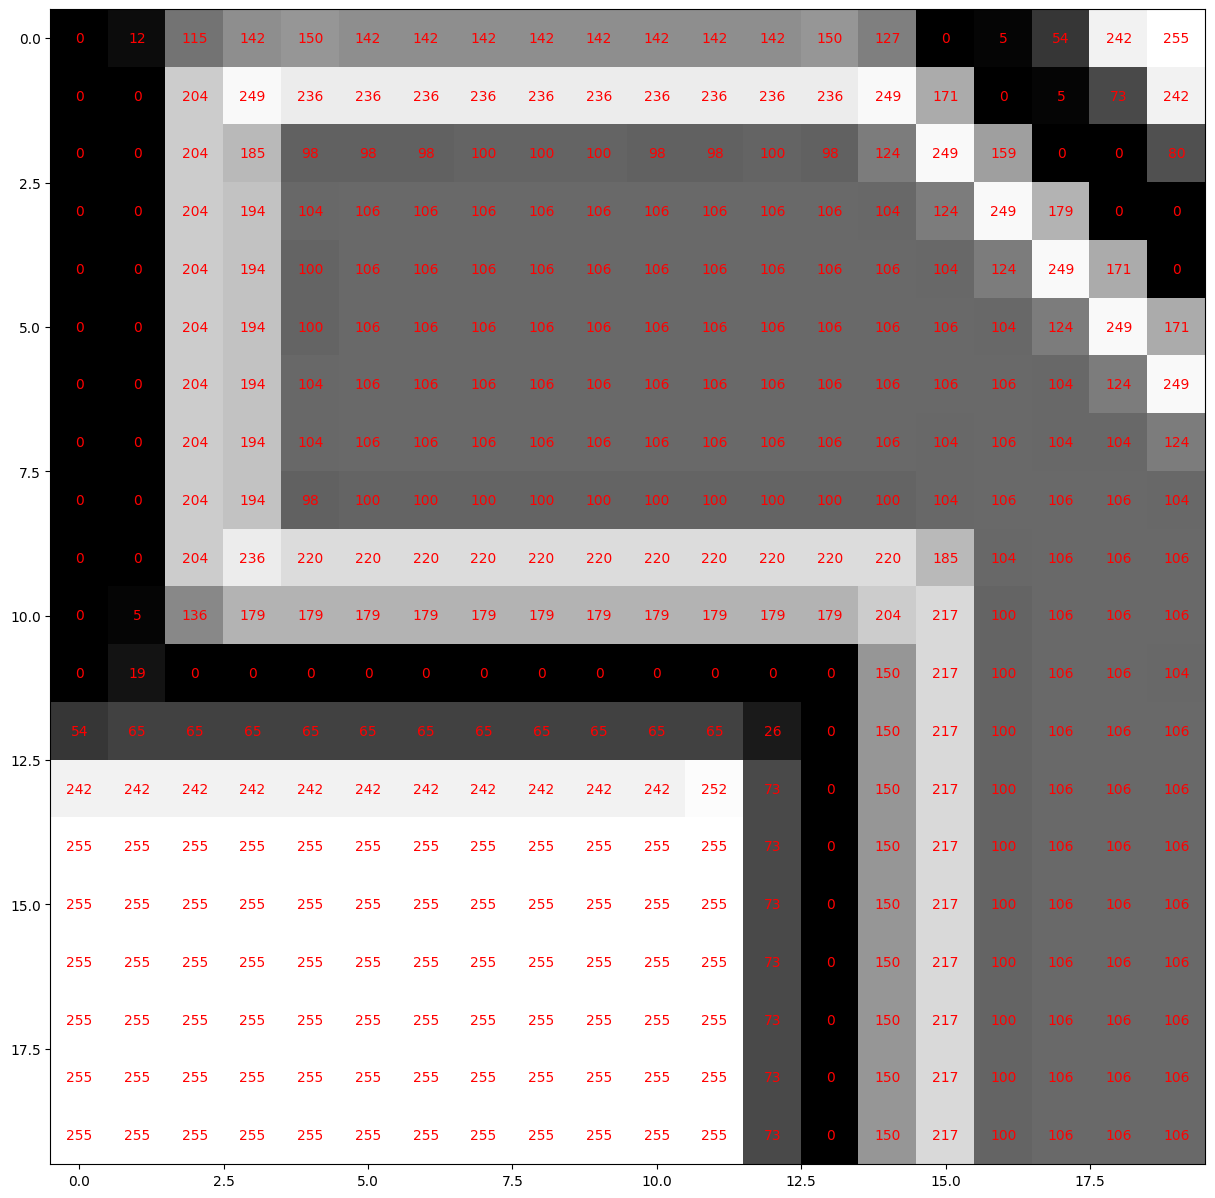

In [49]:
from matplotlib import pyplot as plt


#url = ("https://i.ibb.co/D81PNZz/image.png")
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzFVq9sCTckUxKmHj7YTLlKQH6nkicNS_UQ9XUdvdeLg&s"

image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
#image = Image.open('image.png').convert('RGB')

image_arr = np.array(image)
convolved_arr = convolve(image_arr, filter, padding=(1, 1))

image_arr = np.mean(image_arr[30:50,30:50,:],axis=-1).astype('int')
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image_arr, interpolation='nearest', cmap='gray')

for i in range(image_arr.shape[0]):
    for j in range(image_arr.shape[1]):
        ax.text(j, i, str(image_arr[i,j]), color='r', ha='center', va='center')